## Find the best series in fictional books which was filmed as web series.

In [1]:
! pip install bs4

In [2]:
import numpy as np
import pandas as pd

import requests
from bs4 import BeautifulSoup

In [3]:
URL='https://www.goodreads.com/list/show/1381.Best_Series'

In [4]:
page=requests.get(URL)
page

<Response [200]>

In [5]:
page.status_code

200

In [6]:
htmlcode=page.text

In [7]:
soup=BeautifulSoup(htmlcode)

In [8]:
print(soup.prettify())

<!DOCTYPE html>
<html class="desktop withSiteHeaderTopFullImage">
 <head>
  <title>
   Best Series (3094 books)
  </title>
  <meta content="3,097 books based on 10641 votes: Harry Potter and the Philosopher’s Stone by J.K. Rowling, The Lightning Thief by Rick Riordan, The Hunger Games by Suza..." name="description"/>
  <meta content="telephone=no" name="format-detection"/>
  <link href="https://www.goodreads.com/list/show/1381.Best_Series" rel="canonical"/>
  <script type="text/javascript">
   var ue_t0=window.ue_t0||+new Date();
  </script>
  <script type="text/javascript">
   var ue_mid = "A1PQBFHBHS6YH1";
    var ue_sn = "www.goodreads.com";
    var ue_furl = "fls-na.amazon.com";
    var ue_sid = "795-9459194-8625167";
    var ue_id = "10ER4D1T3FB51K1JNSFC";

    (function(e){var c=e;var a=c.ue||{};a.main_scope="mainscopecsm";a.q=[];a.t0=c.ue_t0||+new Date();a.d=g;function g(h){return +new Date()-(h?0:a.t0)}function d(h){return function(){a.q.push({n:h,a:arguments,t:a.d()})}}functio

### Web Scrpping

In [9]:
title=soup.find('span',attrs={'itemprop':'name'})
title.text

'Harry Potter and the Philosopher’s Stone (Harry Potter, #1)'

In [10]:
author=soup.find('span',attrs={'itemprop':'author'})
author.text

'\n\nJ.K. Rowling\n\n'

In [11]:
rating=soup.find('span',attrs={'class':'minirating'})
rating.text

' 4.47 avg rating — 9,529,131 ratings'

In [12]:
score=soup.find('a',attrs={'href':'#'})
score.text

'score: 350,040'

In [13]:
votes=soup.find('span',attrs={'class':'smallText uitext'})
votes.text

'\nscore: 350,040,\n              and\n3,532 people voted\n              \u2003\n              \n            '

In [14]:
for i in range(1,7):
    print('https://www.goodreads.com/list/show/1381.Best_Series?page={}'.format(i))

https://www.goodreads.com/list/show/1381.Best_Series?page=1
https://www.goodreads.com/list/show/1381.Best_Series?page=2
https://www.goodreads.com/list/show/1381.Best_Series?page=3
https://www.goodreads.com/list/show/1381.Best_Series?page=4
https://www.goodreads.com/list/show/1381.Best_Series?page=5
https://www.goodreads.com/list/show/1381.Best_Series?page=6


In [15]:
title=[]
author=[]
rating=[]
score=[]
votes=[]

for i in range(1,6):
    URL='https://www.goodreads.com/list/show/1381.Best_Series?page={}'.format(i)
    
    page=requests.get(URL)
    htmlcode=page.text
    soup=BeautifulSoup(htmlcode)
    
    for x in soup.find_all('td',attrs={'width':'100%'}):
        
        Title=x.find('span',attrs={'itemprop':'name'})
        if Title is None:
            title.append(np.NaN)
        else:
            title.append(Title.text)
            
        Author=x.find('span',attrs={'itemprop':'author'})
        if Author is None:
            author.append(np.NaN)
        else:
            author.append(Author.text)
            
        Rating=x.find('span',attrs={'class':'minirating'})
        if Rating is None:
            rating.append(np.NaN)
        else:
            rating.append(Rating.text)   
            
        Score=x.find('a',attrs={'href':'#'})
        if Score is None:
            score.append(np.NaN)
        else:
            score.append(Score.text)
            
        Votes=x.find('span',attrs={'class':'smallText uitext'})
        if Votes is None:
            votes.append(np.NaN)
        else:
            votes.append(Votes.text)

In [16]:
print(len(title))
print(len(author))
print(len(rating))
print(len(score))
print(len(votes))

500
500
500
500
500


### Create a DataFrame and save it as csv file

In [17]:
df = pd.DataFrame({'Title' :title,'Author':author,'Rating' : rating,'Score':score,'Votes':votes})
df.head()

,Title,Author,Rating,Score,Votes
0,Harry Potter and the Philosopher’s Stone (Harr...,\n\nJ.K. Rowling\n\n,"4.47 avg rating — 9,529,131 ratings","score: 350,040","\nscore: 350,040,\n and\n3,532 pe..."
1,The Lightning Thief (Percy Jackson and the Oly...,\n\nRick Riordan (Goodreads Author)\n\n,"4.30 avg rating — 2,784,187 ratings","score: 153,771","\nscore: 153,771,\n and\n1,577 pe..."
2,"The Hunger Games (The Hunger Games, #1)",\n\nSuzanne Collins\n\n,"4.33 avg rating — 8,175,227 ratings","score: 146,075","\nscore: 146,075,\n and\n1,495 pe..."
3,"City of Bones (The Mortal Instruments, #1)",\n\nCassandra Clare (Goodreads Author)\n\n,"4.08 avg rating — 1,947,550 ratings","score: 141,685","\nscore: 141,685,\n and\n1,451 pe..."
4,"Divergent (Divergent, #1)",\n\nVeronica Roth (Goodreads Author)\n\n,"4.15 avg rating — 3,794,880 ratings","score: 135,605","\nscore: 135,605,\n and\n1,397 pe..."


In [18]:
import os
os.getcwd()

'C:\\Users\\bbhav'

In [19]:
df.to_csv(r"C:\Users\bbhav\Downloads\Best_Series.ipynb.csv", index = False)
df.head()

,Title,Author,Rating,Score,Votes
0,Harry Potter and the Philosopher’s Stone (Harr...,\n\nJ.K. Rowling\n\n,"4.47 avg rating — 9,529,131 ratings","score: 350,040","\nscore: 350,040,\n and\n3,532 pe..."
1,The Lightning Thief (Percy Jackson and the Oly...,\n\nRick Riordan (Goodreads Author)\n\n,"4.30 avg rating — 2,784,187 ratings","score: 153,771","\nscore: 153,771,\n and\n1,577 pe..."
2,"The Hunger Games (The Hunger Games, #1)",\n\nSuzanne Collins\n\n,"4.33 avg rating — 8,175,227 ratings","score: 146,075","\nscore: 146,075,\n and\n1,495 pe..."
3,"City of Bones (The Mortal Instruments, #1)",\n\nCassandra Clare (Goodreads Author)\n\n,"4.08 avg rating — 1,947,550 ratings","score: 141,685","\nscore: 141,685,\n and\n1,451 pe..."
4,"Divergent (Divergent, #1)",\n\nVeronica Roth (Goodreads Author)\n\n,"4.15 avg rating — 3,794,880 ratings","score: 135,605","\nscore: 135,605,\n and\n1,397 pe..."


### Extracting the details

In [20]:
import numpy as np
import pandas as pd

import re
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv(r"C:\Users\bbhav\Downloads\Best_Series.ipynb.csv")
df.head()

,Title,Author,Rating,Score,Votes
0,Harry Potter and the Philosopher’s Stone (Harr...,\n\nJ.K. Rowling\n\n,"4.47 avg rating — 9,529,131 ratings","score: 350,040","\nscore: 350,040,\n and\n3,532 pe..."
1,The Lightning Thief (Percy Jackson and the Oly...,\n\nRick Riordan (Goodreads Author)\n\n,"4.30 avg rating — 2,784,187 ratings","score: 153,771","\nscore: 153,771,\n and\n1,577 pe..."
2,"The Hunger Games (The Hunger Games, #1)",\n\nSuzanne Collins\n\n,"4.33 avg rating — 8,175,227 ratings","score: 146,075","\nscore: 146,075,\n and\n1,495 pe..."
3,"City of Bones (The Mortal Instruments, #1)",\n\nCassandra Clare (Goodreads Author)\n\n,"4.08 avg rating — 1,947,550 ratings","score: 141,685","\nscore: 141,685,\n and\n1,451 pe..."
4,"Divergent (Divergent, #1)",\n\nVeronica Roth (Goodreads Author)\n\n,"4.15 avg rating — 3,794,880 ratings","score: 135,605","\nscore: 135,605,\n and\n1,397 pe..."


### Data Cleaning

In [22]:
# Cleaning Author Column

# regex=r'\>[A-Za-z]+\s[A-Za-z]+'

df['Author']=df['Author'].str.replace('\n','').replace('\(Goodreads Author\)','',regex=True)
df.head()

,Title,Author,Rating,Score,Votes
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"4.47 avg rating — 9,529,131 ratings","score: 350,040","\nscore: 350,040,\n and\n3,532 pe..."
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,"4.30 avg rating — 2,784,187 ratings","score: 153,771","\nscore: 153,771,\n and\n1,577 pe..."
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"4.33 avg rating — 8,175,227 ratings","score: 146,075","\nscore: 146,075,\n and\n1,495 pe..."
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,"4.08 avg rating — 1,947,550 ratings","score: 141,685","\nscore: 141,685,\n and\n1,451 pe..."
4,"Divergent (Divergent, #1)",Veronica Roth,"4.15 avg rating — 3,794,880 ratings","score: 135,605","\nscore: 135,605,\n and\n1,397 pe..."


In [23]:
# Splitting Ratings columns

df[['Ratings','Reviews']]=df['Rating'].str.split('—',expand=True)
df.head()

,Title,Author,Rating,Score,Votes,Ratings,Reviews
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"4.47 avg rating — 9,529,131 ratings","score: 350,040","\nscore: 350,040,\n and\n3,532 pe...",4.47 avg rating,"9,529,131 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,"4.30 avg rating — 2,784,187 ratings","score: 153,771","\nscore: 153,771,\n and\n1,577 pe...",4.30 avg rating,"2,784,187 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"4.33 avg rating — 8,175,227 ratings","score: 146,075","\nscore: 146,075,\n and\n1,495 pe...",4.33 avg rating,"8,175,227 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,"4.08 avg rating — 1,947,550 ratings","score: 141,685","\nscore: 141,685,\n and\n1,451 pe...",4.08 avg rating,"1,947,550 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,"4.15 avg rating — 3,794,880 ratings","score: 135,605","\nscore: 135,605,\n and\n1,397 pe...",4.15 avg rating,"3,794,880 ratings"


In [24]:
# Dropping Rating col

df.drop('Rating',axis=1,inplace=True)
df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,"score: 350,040","\nscore: 350,040,\n and\n3,532 pe...",4.47 avg rating,"9,529,131 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,"score: 153,771","\nscore: 153,771,\n and\n1,577 pe...",4.30 avg rating,"2,784,187 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,"score: 146,075","\nscore: 146,075,\n and\n1,495 pe...",4.33 avg rating,"8,175,227 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,"score: 141,685","\nscore: 141,685,\n and\n1,451 pe...",4.08 avg rating,"1,947,550 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,"score: 135,605","\nscore: 135,605,\n and\n1,397 pe...",4.15 avg rating,"3,794,880 ratings"


In [25]:
# Cleaning Score Column

df['Score']=df['Score'].str.replace('score: ','')
df.Score=df.Score.apply(lambda x: int(x.replace(',','')) if ',' in x else int(x))
df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,350040,"\nscore: 350,040,\n and\n3,532 pe...",4.47 avg rating,"9,529,131 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,153771,"\nscore: 153,771,\n and\n1,577 pe...",4.30 avg rating,"2,784,187 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,146075,"\nscore: 146,075,\n and\n1,495 pe...",4.33 avg rating,"8,175,227 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141685,"\nscore: 141,685,\n and\n1,451 pe...",4.08 avg rating,"1,947,550 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,135605,"\nscore: 135,605,\n and\n1,397 pe...",4.15 avg rating,"3,794,880 ratings"


In [26]:
# Cleaning Votes Column

regex=r'(.*)\s?people'

df['Votes']=df['Votes'].apply(lambda x:re.findall(regex,x))

df.Votes=df.Votes.apply(lambda x:''.join(x))

df.Votes=df.Votes.apply(lambda x: int(x.replace(',','')) if ',' in x else int(x))

df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,350040,3532,4.47 avg rating,"9,529,131 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,153771,1577,4.30 avg rating,"2,784,187 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,146075,1495,4.33 avg rating,"8,175,227 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141685,1451,4.08 avg rating,"1,947,550 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,135605,1397,4.15 avg rating,"3,794,880 ratings"


In [27]:
# Cleaning Ratings Column

df['Ratings']=df['Ratings'].str.replace('avg rating','').replace('really liked it','',regex=True)

df['Ratings']=df['Ratings'].str.replace('avg rating','').replace('it was amazing','',regex=True)

df['Ratings']=df['Ratings'].apply(lambda x: float(x))

df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,350040,3532,4.47,"9,529,131 ratings"
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,153771,1577,4.30,"2,784,187 ratings"
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,146075,1495,4.33,"8,175,227 ratings"
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141685,1451,4.08,"1,947,550 ratings"
4,"Divergent (Divergent, #1)",Veronica Roth,135605,1397,4.15,"3,794,880 ratings"


In [28]:
# Cleaning Reviews Column

df['Reviews']=df['Reviews'].str.replace('ratings','')

df['Reviews']=df['Reviews'].apply(lambda x: int(x.replace(',','')) if ',' in x else int(x))

df.head()

,Title,Author,Score,Votes,Ratings,Reviews
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,350040,3532,4.47,9529131
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,153771,1577,4.30,2784187
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,146075,1495,4.33,8175227
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141685,1451,4.08,1947550
4,"Divergent (Divergent, #1)",Veronica Roth,135605,1397,4.15,3794880


In [29]:
# Adding Overview Column

df['Overview']=df['Ratings'].apply(lambda x: 'Excellent' if x>=4.5 else('Good' if x>=4 else('Average' if x>=3 else x)))
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,350040,3532,4.47,9529131,Good
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,153771,1577,4.30,2784187,Good
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,146075,1495,4.33,8175227,Good
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141685,1451,4.08,1947550,Good
4,"Divergent (Divergent, #1)",Veronica Roth,135605,1397,4.15,3794880,Good


In [30]:
# Adding Hashtag Column

df['Hashtag']='#1'
df['Hashtag'][90:91]='#0'
df['Hashtag'][467:468]='#2'
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,350040,3532,4.47,9529131,Good,#1
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,153771,1577,4.30,2784187,Good,#1
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,146075,1495,4.33,8175227,Good,#1
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141685,1451,4.08,1947550,Good,#1
4,"Divergent (Divergent, #1)",Veronica Roth,135605,1397,4.15,3794880,Good,#1


In [31]:
df.Hashtag.value_counts()

#1    498
#0      1
#2      1
Name: Hashtag, dtype: int64

In [32]:
# Adding Denotes Column

df['Denotes']=df['Hashtag'].apply(lambda x: 'First Book' if x=='#1' else('Prequel' if x=='#0' else('Prequel of the next Book' if x=='#2' else x)))

df.Denotes=df.Denotes.apply(lambda x:''.join(x))

df.Hashtag=df.Hashtag.apply(lambda x:''.join(x))

df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,350040,3532,4.47,9529131,Good,#1,First Book
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,153771,1577,4.30,2784187,Good,#1,First Book
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,146075,1495,4.33,8175227,Good,#1,First Book
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141685,1451,4.08,1947550,Good,#1,First Book
4,"Divergent (Divergent, #1)",Veronica Roth,135605,1397,4.15,3794880,Good,#1,First Book


In [33]:
# Adding Series Column

regex=r'\((.*)?,'

df['Series']=df['Title'].apply(lambda x:re.findall(regex,x))

df.Series=df.Series.apply(lambda x:''.join(x))

df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,350040,3532,4.47,9529131,Good,#1,First Book,Harry Potter
1,The Lightning Thief (Percy Jackson and the Oly...,Rick Riordan,153771,1577,4.30,2784187,Good,#1,First Book,Percy Jackson and the Olympians
2,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,146075,1495,4.33,8175227,Good,#1,First Book,The Hunger Games
3,"City of Bones (The Mortal Instruments, #1)",Cassandra Clare,141685,1451,4.08,1947550,Good,#1,First Book,The Mortal Instruments
4,"Divergent (Divergent, #1)",Veronica Roth,135605,1397,4.15,3794880,Good,#1,First Book,Divergent


In [34]:
# Cleaning Title Column

regex=r'(.*)\('

df['Title']=df['Title'].apply(lambda x:re.findall(regex,x))

df['Title']=df['Title'].apply(lambda x:''.join(x))

df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Philosopher’s Stone,J.K. Rowling,350040,3532,4.47,9529131,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,153771,1577,4.30,2784187,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,146075,1495,4.33,8175227,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,141685,1451,4.08,1947550,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,135605,1397,4.15,3794880,Good,#1,First Book,Divergent


In [35]:
# replacing the empty rows with nan value

df=df.replace(r"^\s*$",np.nan,regex=True)

df.dropna(inplace=True)

df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Philosopher’s Stone,J.K. Rowling,350040,3532,4.47,9529131,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,153771,1577,4.30,2784187,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,146075,1495,4.33,8175227,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,141685,1451,4.08,1947550,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,135605,1397,4.15,3794880,Good,#1,First Book,Divergent


In [36]:
df.reset_index(inplace=True)

In [37]:
df.drop(["index"],axis=1,inplace=True)
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Philosopher’s Stone,J.K. Rowling,350040,3532,4.47,9529131,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,153771,1577,4.30,2784187,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,146075,1495,4.33,8175227,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,141685,1451,4.08,1947550,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,135605,1397,4.15,3794880,Good,#1,First Book,Divergent


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     475 non-null    object 
 1   Author    475 non-null    object 
 2   Score     475 non-null    int64  
 3   Votes     475 non-null    int64  
 4   Ratings   475 non-null    float64
 5   Reviews   475 non-null    int64  
 6   Overview  475 non-null    object 
 7   Hashtag   475 non-null    object 
 8   Denotes   475 non-null    object 
 9   Series    475 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 37.2+ KB


In [39]:
df.describe()

,Score,Votes,Ratings,Reviews
count,475.000000,475.000000,475.000000,4.750000e+02
mean,7712.408421,82.562105,4.028042,3.126302e+05
std,23405.266037,238.963386,0.199370,7.969453e+05
min,537.000000,6.000000,3.450000,5.600000e+01
25%,853.500000,10.000000,3.900000,4.064650e+04
50%,1506.000000,18.000000,4.030000,8.962200e+04
75%,4444.500000,49.000000,4.160000,2.513815e+05
max,350040.000000,3532.000000,4.680000,9.529131e+06


In [40]:
df.isnull().sum()

Title       0
Author      0
Score       0
Votes       0
Ratings     0
Reviews     0
Overview    0
Hashtag     0
Denotes     0
Series      0
dtype: int64

In [41]:
df.to_csv(r"C:\Users\bbhav\Downloads\Best_Series.ipynb.csv", index = False)

In [42]:
df.to_excel(r"C:\Users\bbhav\Downloads\Best_Series.ipynb.xlsx")

### Data Visualization 

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [44]:
df.head()

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Philosopher’s Stone,J.K. Rowling,350040,3532,4.47,9529131,Good,#1,First Book,Harry Potter
1,The Lightning Thief,Rick Riordan,153771,1577,4.30,2784187,Good,#1,First Book,Percy Jackson and the Olympians
2,The Hunger Games,Suzanne Collins,146075,1495,4.33,8175227,Good,#1,First Book,The Hunger Games
3,City of Bones,Cassandra Clare,141685,1451,4.08,1947550,Good,#1,First Book,The Mortal Instruments
4,Divergent,Veronica Roth,135605,1397,4.15,3794880,Good,#1,First Book,Divergent


### Univariate Analysis

>### I want to know which Author has written highest number of Books

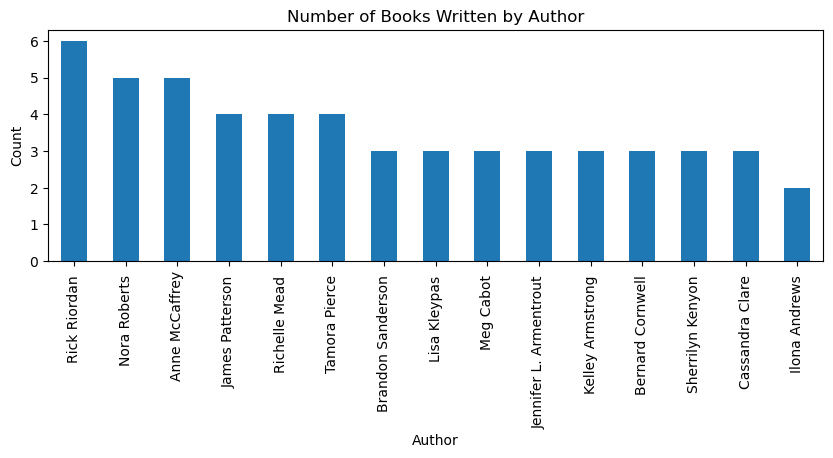

In [45]:
plt.figure(figsize=(10,3))
df["Author"].value_counts().head(15).plot.bar()
plt.xlabel('Author')
plt.ylabel(('Count'))
plt.title('Number of Books Written by Author')
plt.xticks(rotation=90)
plt.show()

>* From the above bar plot we observed that there are three Authors who wrote maximum number of Books, that means the three Authors are repeated in the column

>### I want to know the percentage of individual Overview

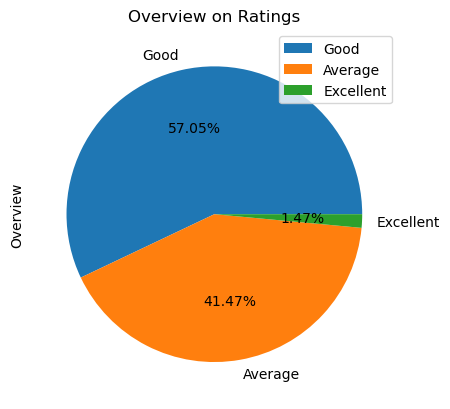

In [46]:
# pie plot

df['Overview'].value_counts().plot.pie(autopct="%.2f%%")
plt.title('Overview on Ratings')
plt.legend(['Good(>=4)','Average(>=3)','Excellent(>=4.5)'])
plt.legend(loc='upper right') 
plt.show()

>* From the above pie chart we observed that most of the Books have Good Overview, means most of the books have ratings between 4 and 4.5

>### I want to know the count of Overview

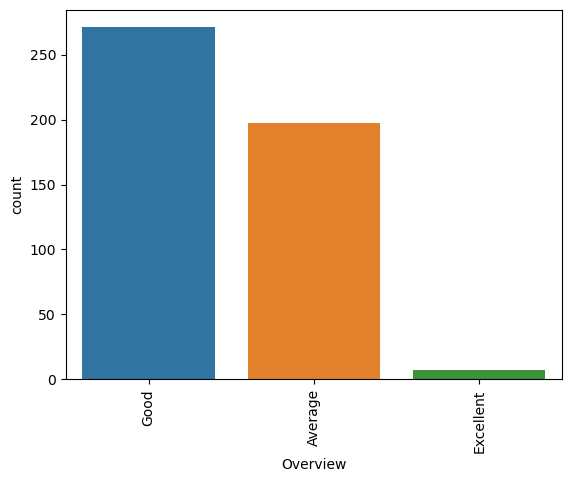

In [47]:
sns.countplot(x=df['Overview'], data=df)
plt.xticks(rotation = 90)
plt.show()

>* From the above bar plot we can observe that tere are more than 250 Good Overview, more than 150 Average Overview and less than 25 Excellent Overview.

>### I want to show the relation between Hashtag and Denotes columns

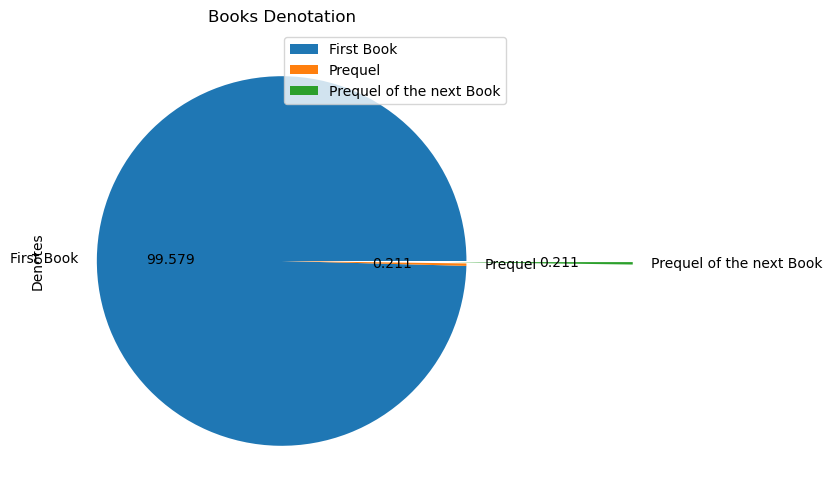

In [48]:
plt.figure(figsize=(6,6))
df["Denotes"].value_counts().plot.pie(explode=[0,0,0.9],autopct='%.3f')
plt.title('Books Denotation')
plt.legend(['#1 - First Book','#0 - Prequel','#2 - Prequel of the next Book'])
plt.legend(loc='upper right') 
plt.show()

>* From the above pie plot we obseved that most of Books are denoted as #1 which are the First Book of the Series

>### I want to know the Density of Votes

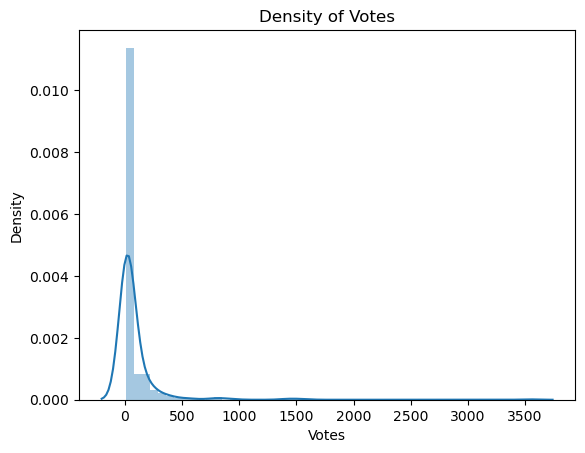

In [49]:
sns.distplot(df['Votes'],kde=True)
plt.title('Density of Votes')
plt.show()

>* From the above plot we can observe that most of the Books got Votes between 0 to 500 and very few Books got Votes greater than 1000

>### To know the frequency of Ratings

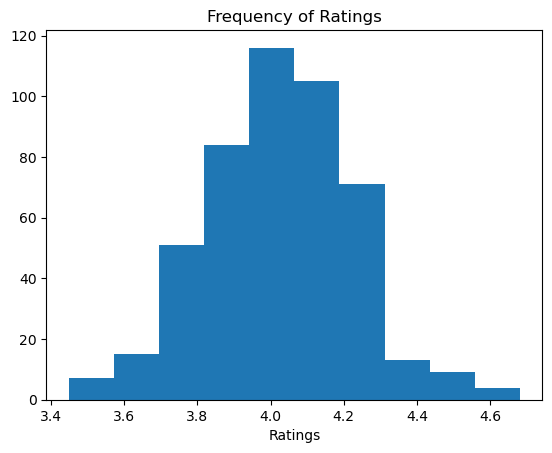

In [50]:
plt.hist(df['Ratings'])
plt.xlabel('Ratings')
plt.title('Frequency of Ratings')
plt.show()

>* This hist plot denotes Frequency distribution of Ratings.
>* We can observe that 4.12 rating has highest frequency.

### Bivariate Analysis

>### I want to know which Series got Votes above 1000

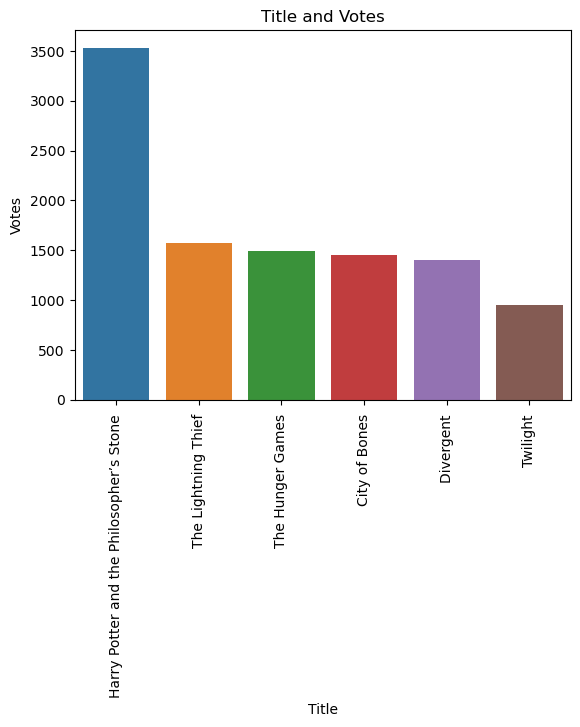

In [51]:
sns.barplot(x=df['Title'].head(6),y=df['Votes'],data=df)
plt.xticks(rotation = 90)
plt.title('Title and Votes')
plt.show()

>* From the above bar plot we can observe that Harry Potter and the Sorcerer's Stone Book got Votes above 3000 and 4 more Books more above 1000.


>### Relation between Votes and Score

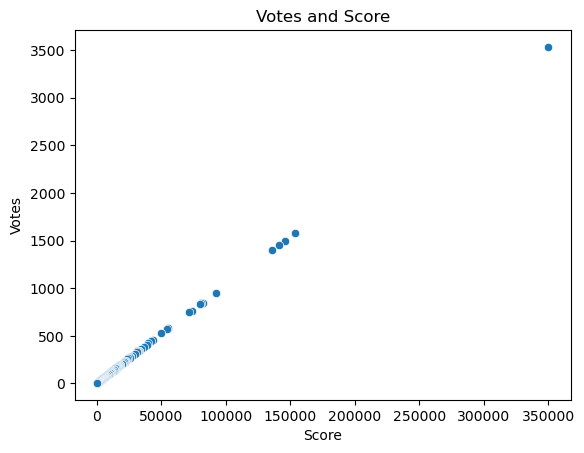

In [52]:
# Scatter plot

sns.scatterplot(x=df['Score'],y=df['Votes'],data=df)
plt.title('Votes and Score')
plt.show()

>* There is perfect positive correlation between Score and Votes nearly equal to 1 . So they depend on each other.

>### Relation between Ratings and Reviews

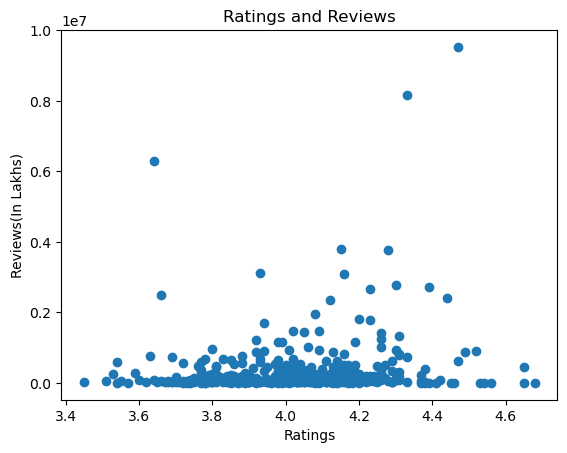

In [53]:
x=df['Ratings']
y=df['Reviews']
plt.xlabel('Ratings')
plt.ylabel('Reviews(In Lakhs)')
plt.title('Ratings and Reviews')
plt.scatter(x,y)
plt.show()

>* From the above plot we can see Ratings and Reviews are not correlated, and they does'nt depend on each other.

### Box plot

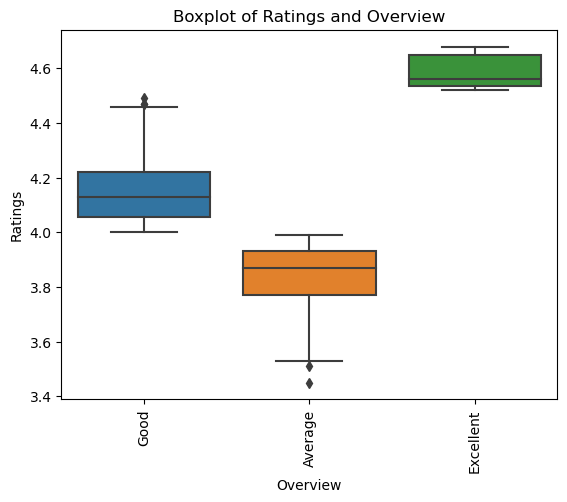

In [54]:
sns.boxplot(data=df,x='Overview', y='Ratings')
plt.xticks(rotation=90)
plt.title('Boxplot of Ratings and Overview')
plt.show()

>* From the above plot we can see that there are outlayers only for Good and Average.

### Violin plot

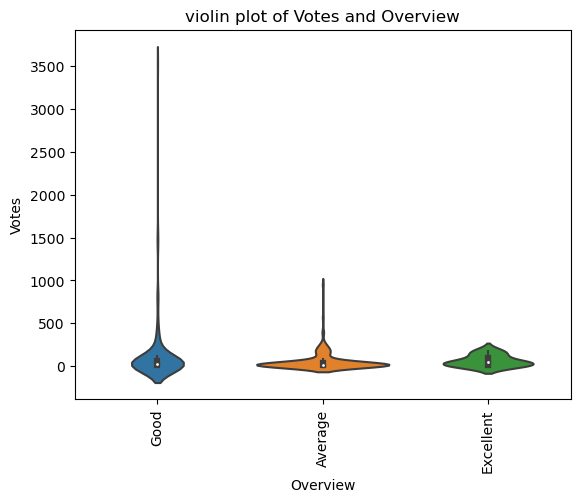

In [55]:
sns.violinplot(y=df['Votes'],x=df['Overview'],data=df)
plt.xticks(rotation = 90)
plt.title('violin plot of Votes and Overview')
plt.show()

>* From the above plot we can see that Average Overviewed Series have highest density of Votes.

### Multivariate Analysis

In [56]:
v=df.select_dtypes(include='number')
v

,Score,Votes,Ratings,Reviews
0,350040,3532,4.47,9529131
1,153771,1577,4.30,2784187
2,146075,1495,4.33,8175227
3,141685,1451,4.08,1947550
4,135605,1397,4.15,3794880
...,...,...,...,...
470,546,8,4.20,78580
471,545,6,4.07,30848
472,540,8,4.38,33073
473,538,6,4.19,48257


### Heatmap

<Axes: >

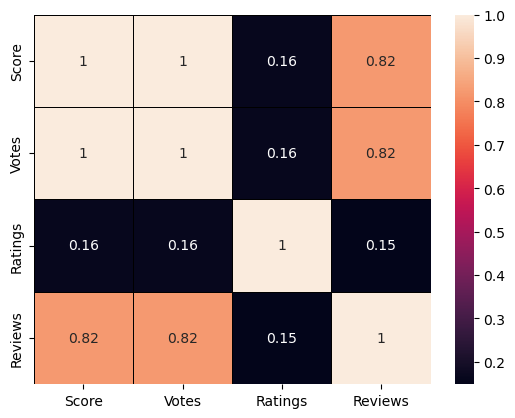

In [57]:
sns.heatmap(v.corr(),annot=True,linewidth=.5,linecolor='black')

>* From the above heatmap plot we can observe that all numerical values are positively correlated. Score and Votes are highly correlated which means as Votes increases Score increases.Ratings and Reviews are less correlated which is nearly equal to zero.

>### Pair plot

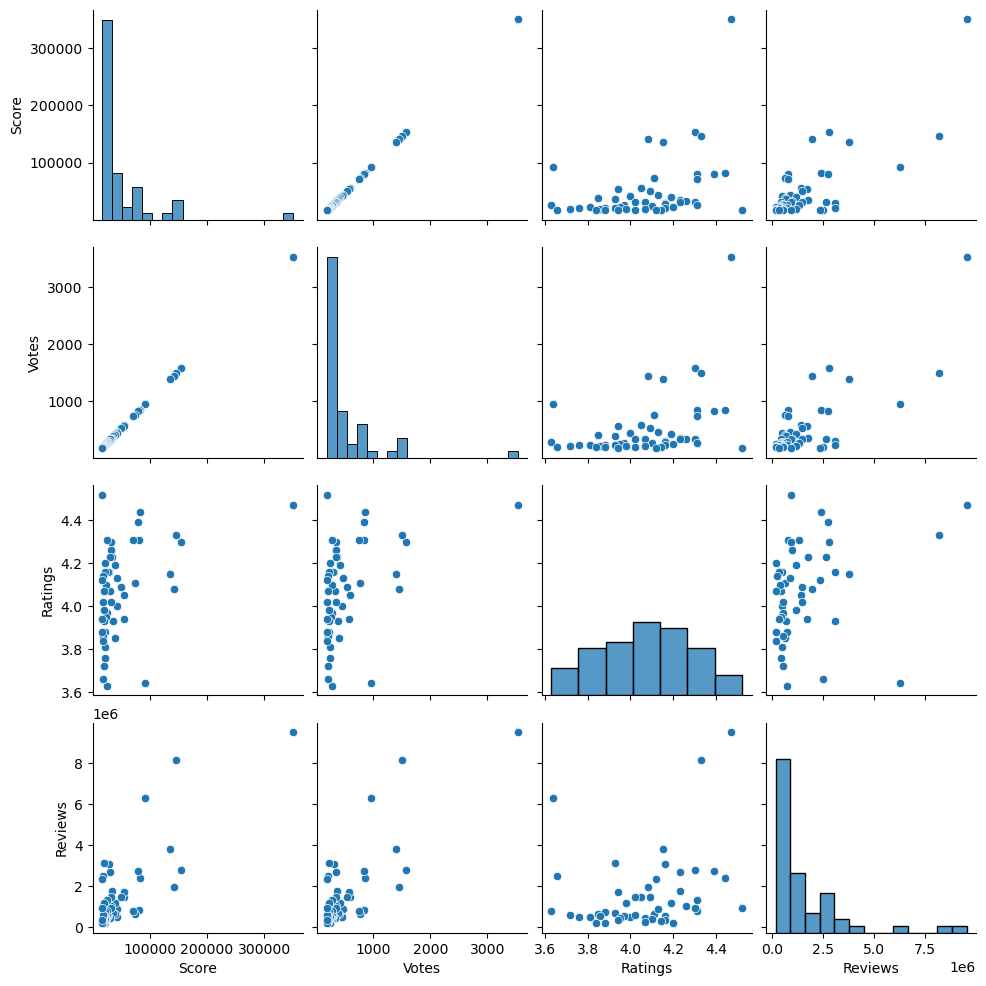

In [58]:
sns.pairplot(df.head(50))
plt.show()

>* From the above pair plot we observed the both distribution of single variable and relation between two variable.

### Scenario

In [59]:
a=float(input('Enter any Ratings greater than 4 but less than 5:'))
b=int(input('Enter any Votes greater than 1000 but less less than 3500:'))
c=int(input('Enter any Score greater than 200000 but less than 344000:'))
d=int(input('Enter any Reviews greater than 7900000 but less than 9100000:'))

Enter any Ratings greater than 4 but less than 5:4.2
Enter any Votes greater than 1000 but less less than 3500:2000
Enter any Score greater than 200000 but less than 344000:340000
Enter any Reviews greater than 7900000 but less than 9100000:8200000


In [60]:
df[(df['Ratings']>a)&(df['Votes']>b)&(df['Score']>c)&(df['Reviews']>d)]

,Title,Author,Score,Votes,Ratings,Reviews,Overview,Hashtag,Denotes,Series
0,Harry Potter and the Philosopher’s Stone,J.K. Rowling,350040,3532,4.47,9529131,Good,#1,First Book,Harry Potter


### Conclusion:

>* From the above Scenario we can say that Harry Potter and the Sorcerer’s Stone the First book of Harry Potter Series, is mostly read and highly recommended by the  nominees.
